In [76]:
import pandas as pd
import numpy as np
import nltk
import string
import re
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [77]:
def load_data():
  data = pd.read_excel('/content/dataujibersihfix.xlsx')
  return data

In [78]:
tweet_df = load_data()

In [79]:
tweet_df.head()

,full_text,Kategori,lower,h_angka,tokenizing,filtering,tweet_clean,stopwords,bersih
0,Timnas Indonesia U-17 yang dipersiapkan untuk ...,Netral,timnas indonesia u-17 yang dipersiapkan untuk ...,timnas indonesia u yang dipersiapkan untuk pia...,"['timnas', 'indonesia', 'u', 'yang', 'dipersia...",timnas indonesia u yang dipersiapkan untuk pia...,timnas indonesia u yang dipersiapkan untuk pia...,timnas indonesia u dipersiapkan piala dunia me...,timnas indonesia u siap piala dunia raih menan...
1,"Apa cuma gue yg baru tau, segitu concernnya Pa...",Positif,"apa cuma gue yg baru tau, segitu concernnya pa...",apa cuma gue yg baru tau segitu concernnya pak...,"['apa', 'cuma', 'gue', 'yg', 'baru', 'tau', 's...",apa cuma gue yg baru tau segitu concernnya pak...,apa cuma gue yang baru tau segitu concernnya p...,cuma gue baru segitu concernnya pak sama perse...,cuma gue baru segitu concernnya pak sama perse...
2,Tiket Piala Dunia U-17 di Indonesia Cuma Rp75 ...,Netral,tiket piala dunia u-17 di indonesia cuma rp75 ...,tiket piala dunia u di indonesia cuma rp ribu ...,"['tiket', 'piala', 'dunia', 'u', 'di', 'indone...",tiket piala dunia u di indonesia cuma rp ribu ...,tiket piala dunia u di indonesia cuma rp ribu ...,tiket piala dunia u indonesia cuma rp ribu car...,tiket piala dunia u indonesia cuma rp ribu car...
3,"Sambut Piala Dunia U-17, Badak Sumatera Lahir ...",Netral,"sambut piala dunia u-17, badak sumatera lahir ...",sambut piala dunia u badak sumatera lahir dari...,"['sambut', 'piala', 'dunia', 'u', 'badak', 'su...",sambut piala dunia u badak sumatera lahir dari...,sambut piala dunia u badak sumatera lahir dari...,sambut piala dunia u badak sumatera lahir pasa...,sambut piala dunia u badak sumatera lahir pasa...
4,Pemkot Surabaya Dampingi Panitia Lokal Piala D...,Netral,pemkot surabaya dampingi panitia lokal piala d...,pemkot surabaya dampingi panitia lokal piala d...,"['pemkot', 'surabaya', 'dampingi', 'panitia', ...",pemkot surabaya dampingi panitia lokal piala d...,pemkot surabaya dampingi panitia lokal piala d...,pemkot surabaya dampingi panitia lokal piala d...,pemkot surabaya damping panitia lokal piala du...


In [80]:
df = pd.DataFrame(tweet_df[['Kategori','full_text']])

In [81]:
df['Kategori'].value_counts()

,count
Kategori,
Netral,1167
Positif,695
Negatif,182


Text(0.5, 1.0, 'Dataset dan Labeling')

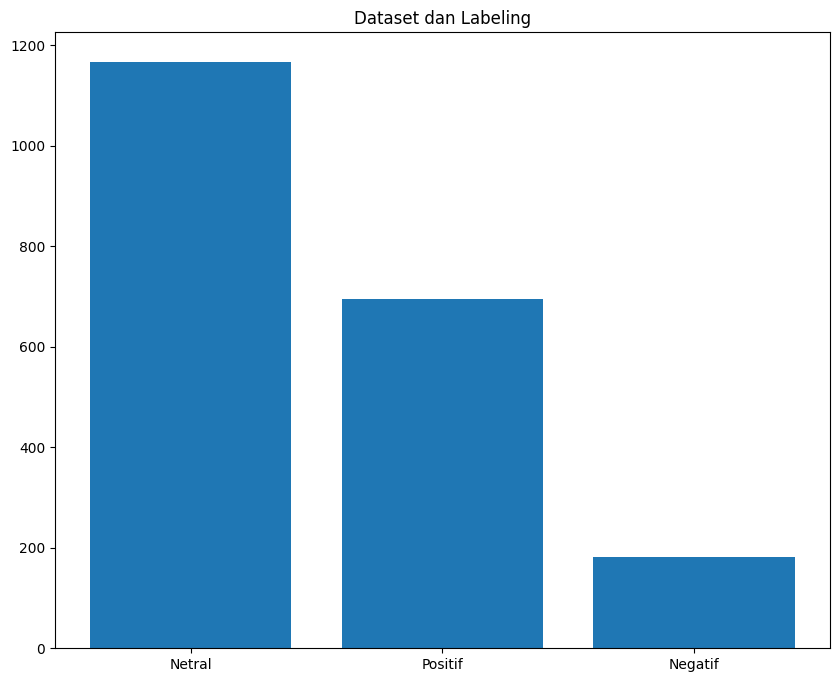

In [82]:
import matplotlib.pyplot as plt
from collections import Counter
label_cnt = Counter(df['Kategori'])
plt.figure(figsize=(10,8))
plt.bar(label_cnt.keys(), label_cnt.values())
plt.title("Dataset dan Labeling")


In [83]:
X = df.drop(['Kategori'], axis=1)
y = df['Kategori']

In [84]:
X=df
Y=df['Kategori']

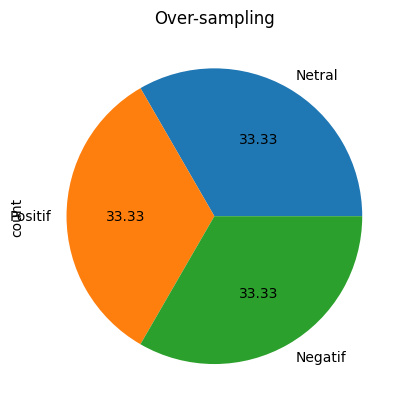

In [85]:

from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(sampling_strategy="not majority")
X_res, y_res = ros.fit_resample(X, y)  # Now use the correct X and y

ax = y_res.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Over-sampling")

plt.show()

In [86]:
# Class distribution
y_res.value_counts()

,count
Kategori,
Netral,1167
Positif,1167
Negatif,1167


In [87]:
df = X_res

In [88]:
from sklearn.feature_extraction.text import CountVectorizer
bow_transformer = CountVectorizer().fit(df['full_text'].values.astype('U'))
bow_transformer.vocabulary_

{'timnas': 5626,
 'indonesia': 2186,
 '17': 24,
 'yang': 6003,
 'dipersiapkan': 1423,
 'untuk': 5819,
 'piala': 4413,
 'dunia': 1585,
 'meraih': 3636,
 'kemenangan': 2666,
 'atas': 406,
 'sc': 4839,
 'paderborn': 4032,
 'youth': 6021,
 'dan': 1169,
 '19': 33,
 'di': 1244,
 'laga': 2975,
 'uji': 5794,
 'coba': 1094,
 'kedua': 2599,
 'senin': 4978,
 '10': 8,
 '2023': 50,
 'apa': 324,
 'cuma': 1139,
 'gue': 1965,
 'yg': 6010,
 'baru': 549,
 'tau': 5398,
 'segitu': 4897,
 'concernnya': 1112,
 'pak': 4038,
 'prabowo': 4511,
 'sama': 4780,
 'persepakbolaan': 4357,
 'kita': 2810,
 'punya': 4583,
 'harapan': 2020,
 'semoga': 4961,
 'tempaan': 5446,
 'fisik': 1745,
 'mental': 3580,
 'aspire': 393,
 'academy': 132,
 'qatar': 4594,
 'menjadikan': 3563,
 'tim': 5622,
 'sebagai': 4857,
 'pesepakbola': 4396,
 'terbaik': 5478,
 'akan': 192,
 'membawa': 3345,
 'berlaga': 723,
 'tiket': 5616,
 'rp75': 4726,
 'ribu': 4701,
 'ini': 2221,
 'cara': 1008,
 'belinya': 614,
 'sambut': 4792,
 'badak': 464,
 's

In [89]:
text_bow = bow_transformer.transform(df['full_text'].values.astype('U'))
print(text_bow)

  (0, 8)	1
  (0, 24)	2
  (0, 33)	1
  (0, 50)	1
  (0, 406)	1
  (0, 1094)	1
  (0, 1169)	1
  (0, 1244)	1
  (0, 1423)	1
  (0, 1585)	1
  (0, 2186)	1
  (0, 2599)	1
  (0, 2666)	1
  (0, 2975)	1
  (0, 3636)	1
  (0, 4032)	1
  (0, 4413)	1
  (0, 4839)	1
  (0, 4978)	1
  (0, 5626)	1
  (0, 5794)	1
  (0, 5819)	1
  (0, 6003)	1
  (0, 6021)	1
  (1, 24)	1
  :	:
  (3499, 4413)	1
  (3499, 5285)	1
  (3499, 5373)	1
  (3499, 5626)	1
  (3499, 6003)	1
  (3500, 24)	1
  (3500, 319)	1
  (3500, 809)	1
  (3500, 873)	1
  (3500, 1169)	1
  (3500, 1585)	1
  (3500, 2036)	1
  (3500, 3122)	1
  (3500, 3488)	1
  (3500, 3872)	1
  (3500, 3909)	1
  (3500, 4083)	1
  (3500, 4242)	1
  (3500, 4413)	1
  (3500, 4434)	1
  (3500, 4911)	1
  (3500, 4950)	1
  (3500, 4961)	1
  (3500, 4990)	1
  (3500, 5889)	1


In [90]:
X = text_bow.toarray()
print(X)
X.shape

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


(3501, 6065)

In [91]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer=TfidfTransformer().fit(text_bow)
print(tfidf_transformer)
tweet_tfidf=tfidf_transformer.transform(text_bow)
print(tweet_tfidf)
print(tweet_tfidf.shape)

TfidfTransformer()
  (0, 6021)	0.31877169901603
  (0, 6003)	0.11618201621814686
  (0, 5819)	0.12492622598419327
  (0, 5794)	0.2852715016178508
  (0, 5626)	0.05866163418953685
  (0, 4978)	0.24579198150999998
  (0, 4839)	0.33480285145336786
  (0, 4413)	0.06009749199174883
  (0, 4032)	0.33480285145336786
  (0, 3636)	0.21838654540499436
  (0, 2975)	0.15372608271523622
  (0, 2666)	0.20914995459600746
  (0, 2599)	0.1977756709283398
  (0, 2186)	0.0822471506552676
  (0, 1585)	0.05971949975556367
  (0, 1423)	0.3073974153483623
  (0, 1244)	0.07658705752679422
  (0, 1169)	0.11028949417289267
  (0, 1094)	0.24579198150999998
  (0, 406)	0.21259018316416167
  (0, 50)	0.09570374450445275
  (0, 33)	0.24579198150999998
  (0, 24)	0.10111957866315074
  (0, 8)	0.18385933736191012
  (1, 6010)	0.2719661346727682
  :	:
  (3499, 1169)	0.11984577851202534
  (3499, 192)	0.15884720419719653
  (3499, 50)	0.31198864006045557
  (3499, 24)	0.05494065739704823
  (3499, 8)	0.19979024827424594
  (3500, 5889)	0.292008118

In [92]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, df.Kategori, test_size=0.2,
random_state=35)

In [93]:
print(f'jumlah Data Latih: {len(x_train)}')
print(f'jumlah Data Uji: {len(x_test)}')

jumlah Data Latih: 2800
jumlah Data Uji: 701


In [94]:
from sklearn.svm import LinearSVC
model = LinearSVC(max_iter=10000).fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


In [95]:
prediction = model.predict(x_test)
predict= pd.Series(prediction)
print(predict.to_string())

0      Positif
1       Netral
2      Positif
3       Netral
4       Netral
5      Positif
6      Positif
7      Negatif
8       Netral
9       Netral
10      Netral
11     Negatif
12     Negatif
13     Negatif
14     Positif
15     Negatif
16     Negatif
17     Positif
18     Negatif
19     Negatif
20     Negatif
21     Positif
22     Negatif
23     Negatif
24     Positif
25      Netral
26     Positif
27     Positif
28     Negatif
29     Positif
30     Positif
31     Positif
32     Positif
33     Negatif
34     Positif
35     Positif
36     Negatif
37      Netral
38     Negatif
39     Positif
40     Negatif
41     Negatif
42     Positif
43     Positif
44     Negatif
45     Positif
46      Netral
47     Negatif
48     Positif
49     Negatif
50     Positif
51     Negatif
52      Netral
53     Positif
54      Netral
55     Positif
56     Positif
57     Positif
58     Negatif
59     Positif
60     Negatif
61     Negatif
62     Negatif
63      Netral
64     Positif
65      Netral
66      Ne

In [96]:
true_label= pd.Series(y_test)
print(true_label.to_string())

1038    Positif
1368     Netral
735     Positif
385      Netral
1279     Netral
326     Positif
452     Positif
2576    Negatif
1658     Netral
1383     Netral
1046     Netral
2715    Negatif
219      Netral
2776    Negatif
574     Positif
2287    Negatif
2953    Negatif
3271    Positif
1546    Negatif
2076    Negatif
2955    Negatif
3147    Positif
2126    Negatif
2203    Negatif
3285    Positif
1158     Netral
757     Positif
175     Positif
68      Negatif
157     Positif
703      Netral
1289    Positif
825      Netral
2269    Negatif
918     Positif
3240    Positif
2741    Negatif
1066     Netral
2470    Negatif
3139    Positif
2449    Negatif
2099    Negatif
3289    Positif
3165    Positif
2342    Negatif
1743     Netral
1861     Netral
2121    Negatif
1271    Positif
2301    Negatif
903      Netral
2760    Negatif
1488     Netral
282      Netral
1678     Netral
709     Positif
3236    Positif
3434    Positif
2379    Negatif
257     Positif
1458    Negatif
2475    Negatif
544     

In [97]:
from wordcloud import WordCloud

In [98]:
data_negatif = df[df['Kategori'] == 'Negatif']
data_positif = df[df['Kategori'] == 'Positif']
data_netral = df[df['Kategori'] == 'Netral']

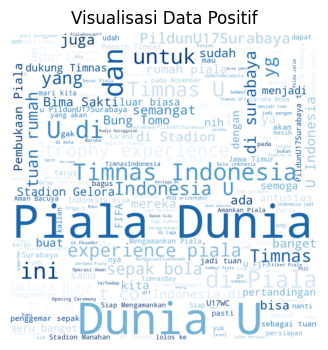

In [99]:
all_text_s1 = ' '.join(str(word) for word in data_positif["full_text"])
wordcloud = WordCloud(colormap = 'Blues', width = 1000, height = 1000, mode = "RGBA", background_color = 'white').generate(all_text_s1)
plt.figure(figsize=(6,4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Visualisasi Data Positif')
plt.margins(x=0, y=0)
plt.show()

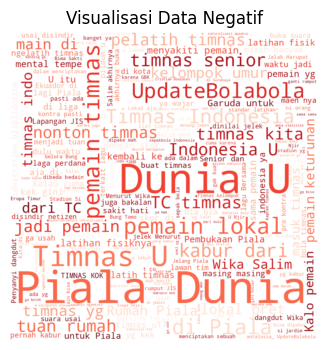

In [100]:
all_text_s2 = ' '.join(str(word) for word in data_negatif["full_text"])
wordcloud = WordCloud(colormap = 'Reds', width = 1000, height = 1000, mode = "RGBA", background_color = 'white').generate(all_text_s2)
plt.figure(figsize=(6,4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Visualisasi Data Negatif')
plt.margins(x=0, y=0)
plt.show()

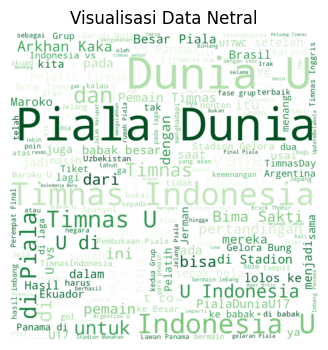

In [101]:
all_text_s3 = ' '.join(str(word) for word in data_netral["full_text"])
wordcloud = WordCloud(colormap = 'Greens', width = 1000, height = 1000, mode = "RGBA", background_color = 'white').generate(all_text_s3)
plt.figure(figsize=(6,4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Visualisasi Data Netral')
plt.margins(x=0, y=0)
plt.show()

In [102]:
#Confussion Matrix
from time import time
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import confusion_matrix
from pandas import DataFrame

test time:  0.037s
accuracy:   0.859
              precision    recall  f1-score   support

    Negative       0.94      1.00      0.97       222
      Netral       0.86      0.71      0.78       234
    Positive       0.79      0.87      0.83       245

    accuracy                           0.86       701
   macro avg       0.86      0.86      0.86       701
weighted avg       0.86      0.86      0.86       701



Text(0.5, 23.52222222222222, 'Label prediksi')

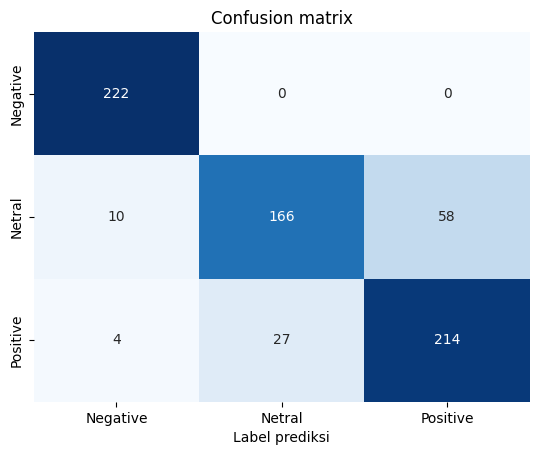

In [103]:
t = time()
y_pred = model.predict(x_test)

test_time = time() - t
print("test time:  %0.3fs" % test_time)

score1 = metrics.accuracy_score(y_test, y_pred)
print("accuracy:   %0.3f" % score1)

print(metrics.classification_report(y_test, y_pred, target_names=['Negative', 'Netral', 'Positive']))

columns = ['Negative','Netral','Positive']
confm = confusion_matrix(y_test, y_pred)
df_cm = DataFrame(confm, index=columns, columns=columns)

ax = sn.heatmap(df_cm, cmap='Blues', annot=True, fmt='d', cbar=False)
ax.set_title('Confusion matrix')
ax.set_xlabel('Label prediksi')

In [104]:
#Cross Validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, x_train,y_train, cv=10)
# Print the accuracy of each fold:
print(scores)
# Print the mean accuracy of all 10 folds
print(scores.mean())

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: Futu

[0.84642857 0.85714286 0.84285714 0.83571429 0.84642857 0.81785714
 0.84642857 0.81785714 0.84285714 0.83571429]
0.8389285714285715


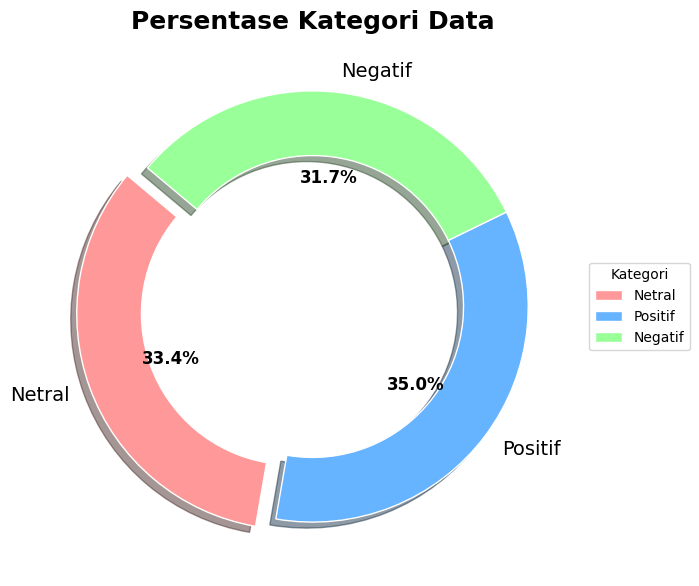

In [106]:
import matplotlib.pyplot as plt

# Data to plot
labels = ['Netral', 'Positif', 'Negatif']
sizes = [33.38, 34.95, 31.67]
colors = ['#ff9999','#66b3ff','#99ff99']
explode = (0.1, 0, 0)  # explode 1st slice (Netral)

# Plot
fig, ax = plt.subplots(figsize=(10, 7), subplot_kw=dict(aspect="equal"))

wedges, texts, autotexts = ax.pie(sizes, explode=explode, labels=labels, colors=colors,
                                  autopct='%1.1f%%', shadow=True, startangle=140,
                                  wedgeprops=dict(width=0.3, edgecolor='w'))

# Customizing the text and autotext
for text in texts:
    text.set_fontsize(14)
    text.set_color('black')

for autotext in autotexts:
    autotext.set_fontsize(12)
    autotext.set_color('black')
    autotext.set_weight('bold')

# Draw lines connecting the percentage to the slices
plt.setp(autotexts, size=12, weight="bold")
plt.setp(texts, size=14)

# Add a title
ax.set_title('Persentase Kategori Data', fontsize=18, weight='bold')

# Add a legend
ax.legend(wedges, labels,
          title="Kategori",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.show()
